In [3]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def load_img(path):
    image=cv2.imread(path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

In [5]:
image=load_img('ironman.jpg')
image.shape

(768, 1366, 3)

In [6]:
transform = A.Compose([
    A.Blur(blur_limit=(1,3),p=0.5),
    A.RandomBrightnessContrast(p=1),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    A.RandomCrop(width=150, height=150),
    A.Normalize()
])

In [7]:
transformed_img=transform(image=image)['image']
transformed_img.shape

(150, 150, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


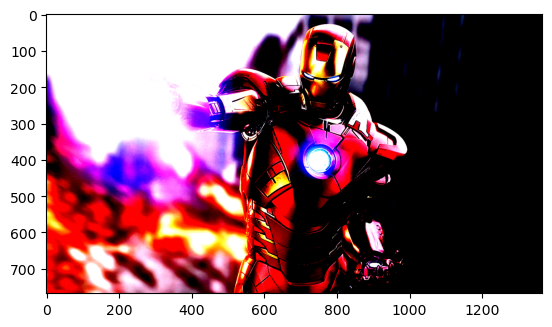

In [18]:
for i, t in enumerate(transform.transforms):
    transformed_img = t(image=image)['image']
    x=plt.imshow(transformed_img)
    plt.savefig(f"transformed_image_{i}.jpg")